In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
n = 100 
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0,1,n) # 전차 생성

# MA(2) 모델 생성
data = [0,0]
for i in range(2,n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])

df = pd.DataFrame({'Value' : data})
df

,Value
0,0.000000
1,0.000000
2,0.250409
3,0.169412
4,0.213241
...,...
95,1.677444
96,-1.285170
97,0.608560
98,1.845325


In [3]:
# MA(2) 모델 생성
model = ARIMA(df['Value'], order=(0, 0, 2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -145.299
Date:                Wed, 31 May 2023   AIC                            298.597
Time:                        17:48:26   BIC                            309.018
Sample:                             0   HQIC                           302.815
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1766      0.124      1.422      0.155      -0.067       0.420
ma.L1          0.4620      0.091      5.051      0.000       0.283       0.641
ma.L2         -0.2639      0.112     -2.357      0.0

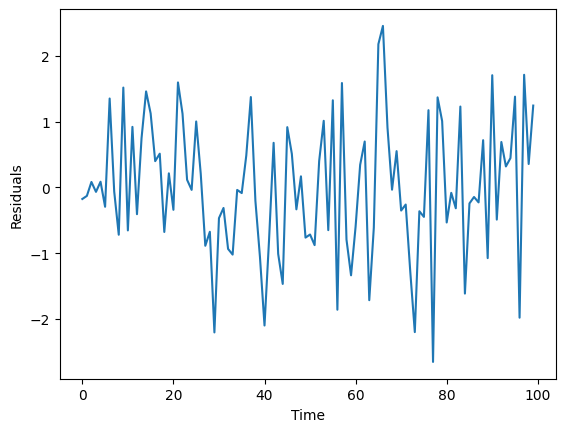

In [4]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()